In [ ]:
# pip install pytesseract
# from google.colab.patches import cv2_imshow
# !sudo apt install tesseract-ocr
# !pip install torch torchvision torchaudio


In [ ]:
# import cv2
# import pytesseract
# import matplotlib.pyplot as plt

In [ ]:
!python --version

Python 3.7.12


In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: PILLOW_VERSION is deprecated and will be removed in a future release. Use __version__ instead.
  


In [ ]:
!pip3 install --upgrade Pillow

     |████████████████████████████████| 4.3 MB 5.4 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# img = cv2.imread('/2.png')
# img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# print(pytesseract.image_to_string(img))
# plt.imshow(img)
# #plt.show()
# cv2.waitKey(0)
# #print(img.shape)

AttributeError: ignored

In [ ]:
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 63.6 MB 45 kB/s 
     |████████████████████████████████| 47.8 MB 1.5 MB/s 
     |████████████████████████████████| 3.0 MB 16.3 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 21.8 MB 84.9 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
reader = easyocr.Reader(['en'],gpu=True)
img_path='/content/1.png'
result = reader.readtext(img_path)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[266, 97], [715, 97], [715, 161], [266, 161]],
  'Catherine Jones',
  0.8766957106985185),
 ([[269, 163], [391, 163], [391, 191], [269, 191]],
  'Pharmacist',
  0.9999522368740765),
 ([[144, 259], [263, 259], [263, 304], [144, 304]],
  'Profile',
  0.9999439937963679),
 ([[1060, 270], [1154, 270], [1154, 302], [1060, 302]],
  'Details',
  0.9999967108462834),
 ([[146, 308], [999, 308], [999, 350], [146, 350]],
  'Experienced and dedicated Pharmacist with experience and success in',
  0.76966255493832),
 ([[1057, 311], [1349, 311], [1349, 347], [1057, 347]],
  'cath jones@yahoo.co.uk',
  0.8320290491320512),
 ([[145, 349], [999, 349], [999, 389], [145, 389]],
  'pharmaceutical services. Bringing forth a strong background in clinical',
  0.6855225085099179),
 ([[144, 389], [961, 389], [961, 430], [144, 430]],
  'pharmacology and medication management: Extensive knowledge',
  0.9845690403444244),
 ([[1058, 394], [1136, 394], [1136, 424], [1058, 424]],
  'Skills',
  0.9998802775971454),

In [ ]:
mots=[]
email=[]
for i in result:
  print(i[1]) #display the text
  mots.append(i[1])
  if '@' in i[1]:
    email.append(i[1])


Catherine Jones
Pharmacist
Profile
Details
Experienced and dedicated Pharmacist with experience and success in
cath jones@yahoo.co.uk
pharmaceutical services. Bringing forth a strong background in clinical
pharmacology and medication management: Extensive knowledge
Skills
of pharmacy operations, pharmacy management, and medications.
Pharmaceutical Operations
Proven track record ofproper customer advisement andan empathetic
attitude towards customers Superior technical and communication
Clinical Applications
skills needed to excel in fast paced working environments.
Patient Counseling
Employment History
Product Safety
Pharmacy Floater at Rite Aid, London
Team Management
October 2014
August 2021
Worked on an as-needed basis, covering for absent pharmacists
Customer Service Skills
and assisting on heavy traffic work days
Treated patients with sensitivity and respect for their privacy:
Filled and verified prescriptions:
Counseled patients on product safety and administration:
Collaborated 

In [ ]:
print(email)

['cath jones@yahoo.co.uk', 'orion@UOLedu']


In [ ]:
result[0][1]

'Catherine Jones'

In [ ]:

top_left = tuple(result[0][0][0]) # first 0 for the 1st element including img coor and text
bottom_right = tuple(result[0][0][2])
text = result [0][1]
font = cv2.FONT_HERSHEY_SIMPLEX


In [ ]:
print(top_left,bottom_right)

(266, 97) (715, 161)


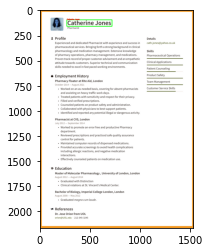

In [ ]:
img = cv2.imread(img_path)  #read image 
img = cv2.rectangle(img,top_left,bottom_right,[0,255,0],5) #rectabgle the text with a rectangle using top/botom corner and a color + line thickness
img = cv2.putText(img,text,top_left,font, 0.5, [255,0,0],2,cv2.LINE_AA) # display the text over the rectangle 
plt.imshow(img)
plt.show()

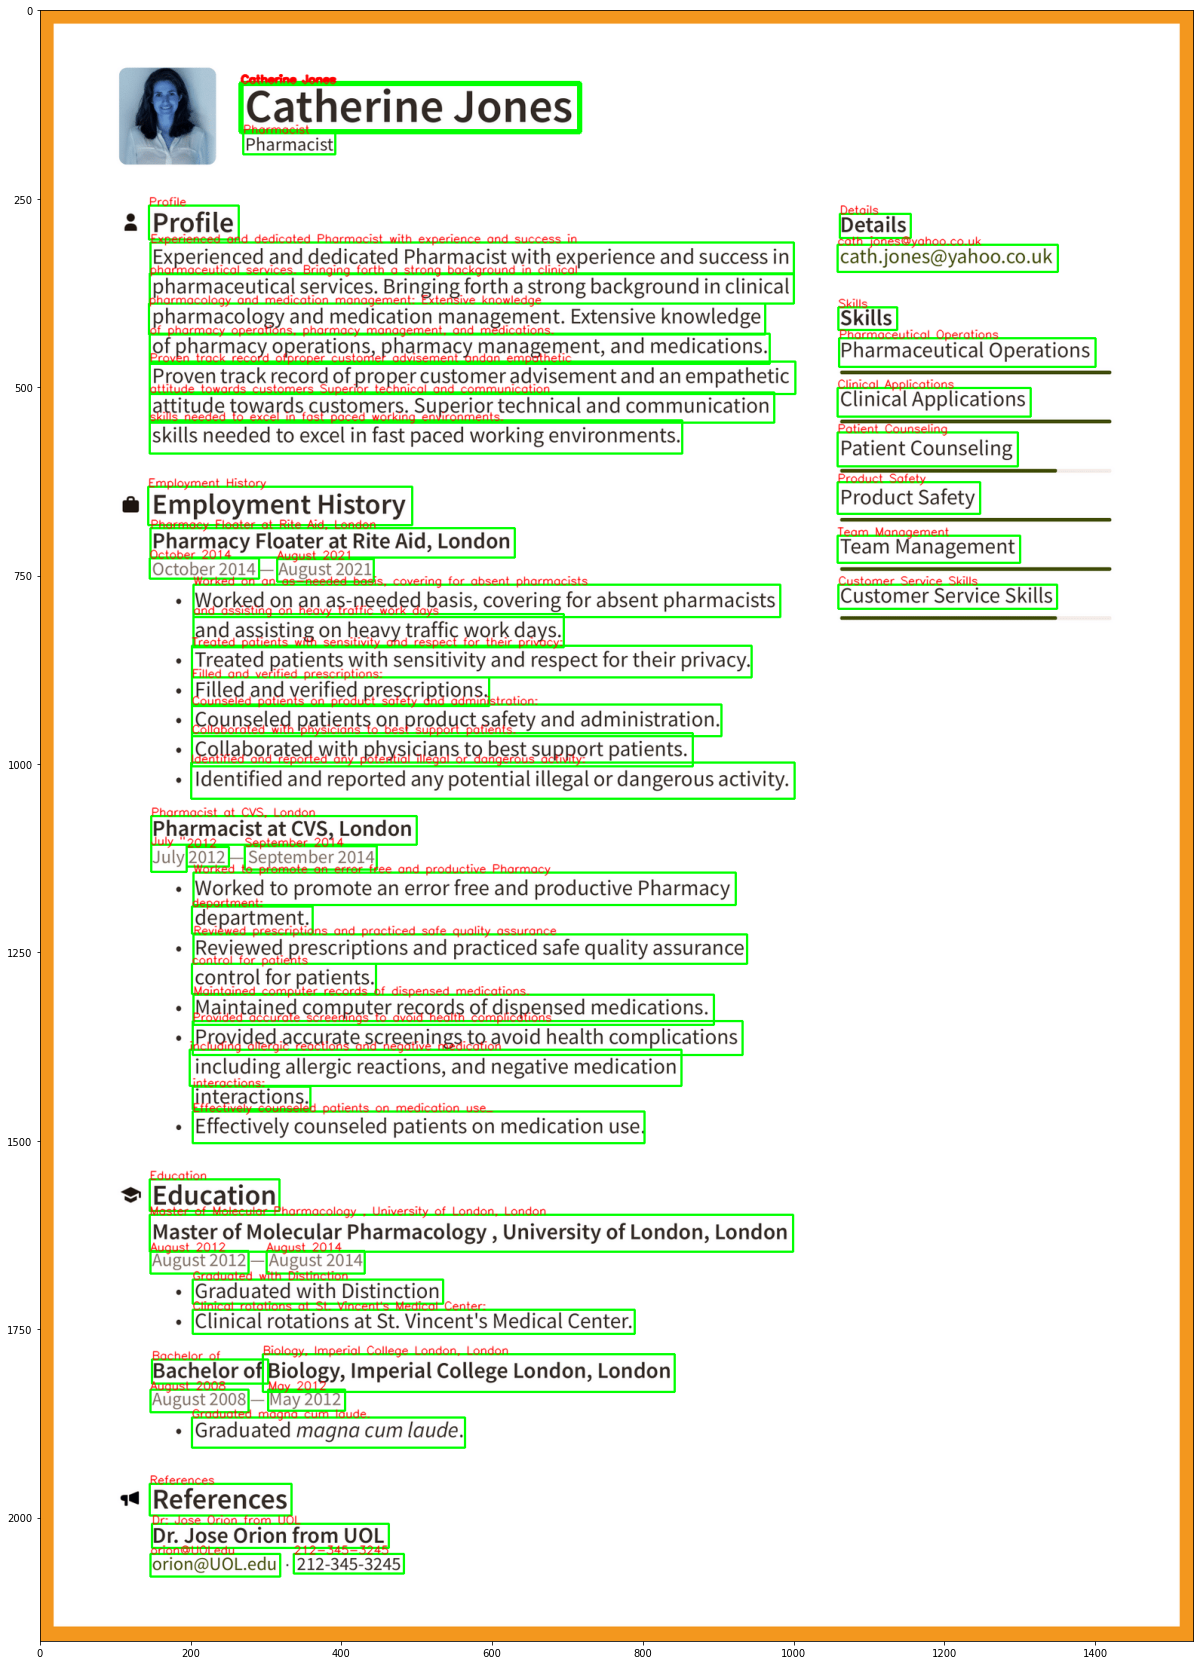

In [ ]:
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img,top_left,bottom_right,[0,255,0],2) #rectabgle the text with a rectangle using top/botom corner and a color + line thickness
  img = cv2.putText(img,text,top_left,font, 0.5, [255,0,0],1,cv2.LINE_AA) # display the text over the rectangle 
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()

In [ ]:
mots

['Catherine Jones',
 'Pharmacist',
 'Profile',
 'Details',
 'Experienced and dedicated Pharmacist with experience and success in',
 'cath jones@yahoo.co.uk',
 'pharmaceutical services. Bringing forth a strong background in clinical',
 'pharmacology and medication management: Extensive knowledge',
 'Skills',
 'of pharmacy operations, pharmacy management, and medications.',
 'Pharmaceutical Operations',
 'Proven track record ofproper customer advisement andan empathetic',
 'attitude towards customers Superior technical and communication',
 'Clinical Applications',
 'skills needed to excel in fast paced working environments.',
 'Patient Counseling',
 'Employment History',
 'Product Safety',
 'Pharmacy Floater at Rite Aid, London',
 'Team Management',
 'October 2014',
 'August 2021',
 'Worked on an as-needed basis, covering for absent pharmacists',
 'Customer Service Skills',
 'and assisting on heavy traffic work days',
 'Treated patients with sensitivity and respect for their privacy:',
 

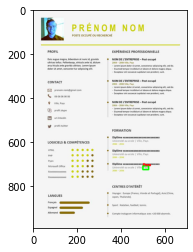

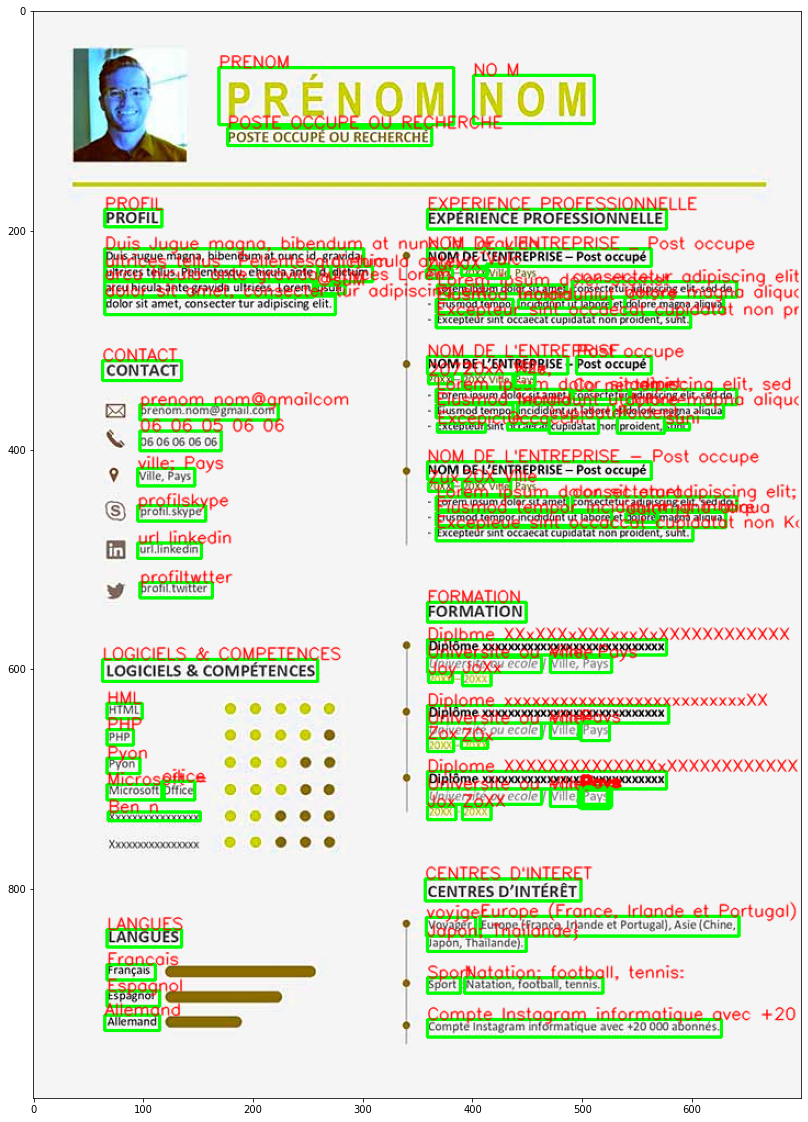

In [ ]:
result=[]
img_path='/content/3.jpg'
result = reader.readtext(img_path)
#result
img = cv2.imread(img_path)  #read image 
img = cv2.rectangle(img,top_left,bottom_right,[0,255,0],5) #rectabgle the text with a rectangle using top/botom corner and a color + line thickness
img = cv2.putText(img,text,top_left,font, 0.5, [255,0,0],2,cv2.LINE_AA) # display the text over the rectangle 
plt.imshow(img)
plt.show()
for detection in result:
  top_left = tuple([int(val) for val in detection[0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  font = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img,top_left,bottom_right,[0,255,0],2) #rectabgle the text with a rectangle using top/botom corner and a color + line thickness
  img = cv2.putText(img,text,top_left,font, 0.5, [255,0,0],1,cv2.LINE_AA) # display the text over the rectangle 
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()

In [ ]:
!pip install pdf2image

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (199 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
from pdf2image import convert_from_path
pdf_file='/content/cv-oussama.pdf'
pages=convert_from_path(pdf_file)
img_file= pdf_file.replace(".pdf","")
count = 0
for page in pages:
     count +=1
     page.save('file-'+str(count)+'.jpg', 'JPEG')



 **PDF READER**

In [ ]:
!pip install PyPDF2
from PyPDF2 import PdfFileReader


In [ ]:
target_file='/content/cv-oussama.pdf'
opened_file=open(target_file,'rb')
pdf=PdfFileReader(opened_file)
num_pages=pdf.getNumPages()
print(num_pages)
page = pdf.getPage(0)
text= page.extractText()
print(text)

1
OUSSAMA HOSNI
COORDONEES 
TELEPHONE
ADRESSE
EMAIL
RESEAUX
(+216) 27 370 281
8, rue Plutarque ,
Jardins de Carthage, 2046 Tunis
Oussama.hosni@esprit.tn
linkedin.com/in/
oussama
-
hosni
-
2256a1214/
Anglais
Français
Arabe
COMPETENCES
Programmation
: C, JAVA, Assembleur, VHDL 
Web & Serveurs
: HTML, CSS, JavaScript, 
jQuery
, SQL/PLSQL
Outils & 
IDEs
: Eclipse, MATLAB, ISIS, MPLAB, 
Packet
Tracer, Visual 
Studio 

: Windows, Linux 
Étudiant motivé en 1ère année d'ingénierie informatique, doté d'une 
grande capacité d'adaptation, je sais me montrer proactif et digne de 
confiance dans la réalisation de mes missions. Dans le cadre de ma 
formation , je suis à la recherche d'un stage d'immersion en entreprise 
pour utiliser mes compétences et accroître mes connaissances en 
développement web.
A PROPOS DE MOI
2020

Actuel
| Cycle 
Ingénieur
En 
Informatique
Ecole Supérieure Privée d'Ingénierie et de Technologies 
-
ESPRIT.
2017

2020| Cycle 
Préparatoire
Faculté des Sciences Mathématiques, 

**EXTRACTION NUMERO TELEPHONE**

In [ ]:
def converter(filepath):
  if  filepath[-3:]=='pdf':
      target_file=filepath
      opened_file=open(target_file,'rb')
      pdf=PdfFileReader(opened_file)
      num_pages=pdf.getNumPages()
      #print(num_pages)
      for i in range(num_pages):
        page = pdf.getPage(0)
        text= page.extractText()
      #print(text)
      infos(text)
  else:
      result=[]
      img_path=filepath
      result = reader.readtext(img_path)
      #result
      for detection in result:
        top_left = tuple([int(val) for val in detection[0][0]])
        bottom_right = tuple([int(val) for val in detection[0][2]])
        text = detection[1]
        font = cv2.FONT_HERSHEY_SIMPLEX
        img1 = cv2.rectangle(img,top_left,bottom_right,[0,255,0],2) #rectabgle the text with a rectangle using top/botom corner and a color + line thickness
        img1 = cv2.putText(img,text,top_left,font, 0.5, [255,0,0],1,cv2.LINE_AA) # display the text over the rectangle 
      plt.figure(figsize=(20,20))
      plt.imshow(img1)
      plt.show()
import re

def infos(text):
  text+='55333222'
  text+='55333522'
  #phonenumber = re.compile(d{8})
  print("phone numbers:")
  pn=re.findall('\d{8}',text)
  if (pn): print(pn)
  pn=re.findall('\d{2}\ \d{3}\ \d{3}',text)
  if (pn): print(pn)
  pn=re.findall('\(\\+\d{3}\)\ \d{2}\ \d{3}\ \d{3}',text)
  if (pn): print(pn)
  text=text.split()
  for i in text:
    if '@' in i:
      print("mail = ",i,"\n")
    #if len(i)==8:
      #print("telephone",i)  
converter('/content/cv-oussama.pdf')
#converter('/content/3.jpg')
#'/content/cv-oussama.pdf'


phone numbers:
['55333222', '55333522']
['27 370 281']
['(+216) 27 370 281']
mail =  Oussama.hosni@esprit.tn 



In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 77 kB 3.3 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61102 sha256=96d37b416bb1ae2901a2fe0eac51c7a133b8d9bc95ba217cf1d54401cb7ff7b9
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2


In [ ]:
import PyPDF2
import requests

import json

fFileObj = open('/content/cv-oussama.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(fFileObj)
pageObj = pdfReader.getPage(0)
print("Total Pages : {} ".format(pdfReader.numPages))

resume = pageObj.extractText()
url = "https://api.iki.ai/api/skills_extraction/"

payload = {
    "text":str(resume[0:2000])
}

headers = {
    'Content-Type': 'application/json'
}

print(len(resume))
r=requests.post(url=url,headers=headers,data=json.dumps(payload))
print(r.json())



Total Pages : 1 
1236


SSLError: ignored

In [ ]:
!pip install nltk 
!pip install spacy==2.3.5 
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz 
!pip install pyresparser

In [ ]:
import warnings
import nltk
from pyresparser import ResumeParser
import en_core_web_sm

nltk.download('stopwords')
warnings.filterwarnings('ignore')
nlp = en_core_web_sm.load()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data=ResumeParser('/content/cv-oussama.pdf').get_extracted_data()
data

{'college_name': None,
 'company_names': None,
 'degree': None,
 'designation': None,
 'email': 'Oussama.hosni@esprit.tn',
 'experience': None,
 'mobile_number': None,
 'name': 'PROPOS DE',
 'no_of_pages': 1,
 'skills': ['Sql',
  'Java',
  'Javascript',
  'Visual',
  'Css',
  'Matlab',
  'Email',
  'Linux',
  'Windows',
  'Communication',
  'C',
  'Html'],
 'total_experience': 0}